
1. 파생변수 없이 예측 

2. 내가 만든 파생변수 또는 변수추가 예측율 높이기
2-2. csv 만들기

html 파일로 올리기
 

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
new = pd.read_csv("data_pepNewCustomers.csv")

In [3]:
df = pd.read_csv("data_pepTestCustomers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id             600 non-null object
age            540 non-null float64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 56.3+ KB


In [5]:
df.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,540.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.662963,0.500000,1.231667,27619.973883,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.299387,0.500417,1.286113,13187.408966,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.500000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,56.000000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,95435.200000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000967F390>,
      dtype=object)

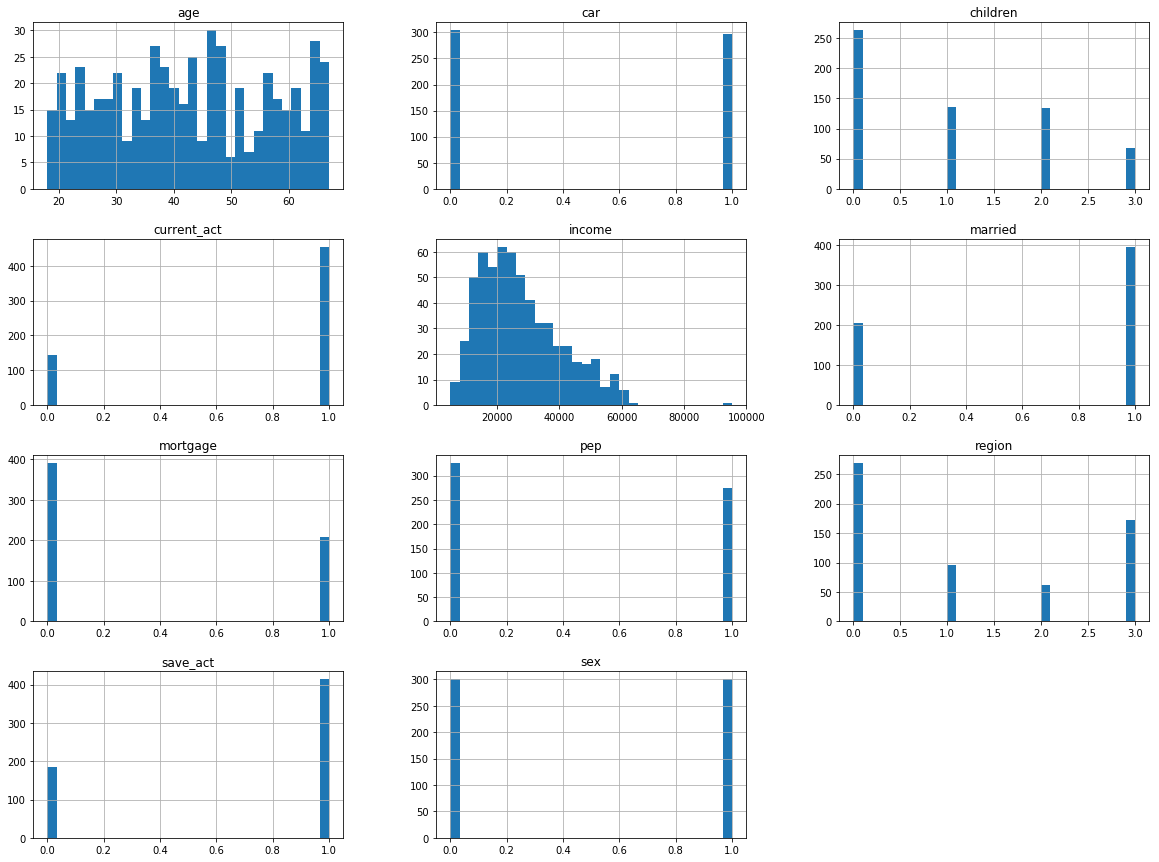

In [6]:
df.hist(bins=30, figsize=(20,15))


In [7]:
print(new.shape)
new.tail()

(200, 11)


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
195,ID12896,66,1,0,58792.6,0,1,1,1,1,1
196,ID12897,19,1,0,17906.8,0,2,1,1,0,0
197,ID12898,54,1,1,29348.8,0,0,0,0,1,1
198,ID12899,42,0,3,20552.5,1,0,1,1,1,0
199,ID12900,34,1,0,25843.1,0,2,0,1,1,0


In [8]:
corr = df.corr()
corr

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
age,1.000000,-0.127984,0.025891,0.743619,0.017157,0.023944,0.068454,0.171417,-0.035449,-0.030696,0.193604
sex,-0.127984,1.000000,-0.035018,-0.030606,0.021110,-0.014206,0.006667,0.007207,-0.019466,0.066465,0.046843
region,0.025891,-0.035018,1.000000,0.009813,0.006188,0.011520,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.743619,-0.030606,0.009813,1.000000,-0.002977,0.042774,0.072590,0.265233,0.035036,-0.019666,0.225086
married,0.017157,0.021110,0.006188,-0.002977,1.000000,-0.048716,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
children,0.023944,-0.014206,0.011520,0.042774,-0.048716,1.000000,0.036455,0.041536,0.006238,-0.074339,-0.057663
car,0.068454,0.006667,0.021860,0.072590,-0.009571,0.036455,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act,0.171417,0.007207,0.084382,0.265233,0.028604,0.041536,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act,-0.035449,-0.019466,-0.013356,0.035036,-0.059996,0.006238,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage,-0.030696,0.066465,0.026083,-0.019666,-0.021711,-0.074339,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


In [9]:
df.corr().pep.sort_values(ascending=False)

pep            1.000000
income         0.225086
age            0.193604
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

In [10]:
mdf=df.copy()

In [11]:
mdf.age.mean()

42.662962962962965

In [12]:
mdf.age.value_counts().head()

40.0    19
64.0    18
58.0    17
27.0    17
43.0    17
Name: age, dtype: int64

In [13]:
mdf.age.fillna(round(mdf.age.mean(),0), inplace=True)
mdf.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0
3,ID12104,23.0,0,3,20375.4,1,3,0,0,1,0,0
4,ID12105,57.0,0,1,50576.3,1,0,0,1,0,0,0


In [14]:
mdf.corr().pep.sort_values(ascending=False)

pep            1.000000
income         0.225086
age            0.183699
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

In [15]:
mdf.age.mean()

42.696666666666665

In [16]:
mdf.age.value_counts()

43.0    77
40.0    19
64.0    18
58.0    17
27.0    17
48.0    16
36.0    16
47.0    16
23.0    15
52.0    14
46.0    14
20.0    14
67.0    14
35.0    13
22.0    13
56.0    12
30.0    12
39.0    12
61.0    12
63.0    11
38.0    11
37.0    11
34.0    11
49.0    11
41.0    10
31.0    10
66.0    10
57.0    10
65.0    10
45.0     9
32.0     9
29.0     9
44.0     8
54.0     8
18.0     8
26.0     8
21.0     8
33.0     8
59.0     8
24.0     8
28.0     8
62.0     7
53.0     7
25.0     7
60.0     7
19.0     7
50.0     6
42.0     6
51.0     5
55.0     3
Name: age, dtype: int64

In [17]:
mdf['realincome'] = np.where(mdf['children']==0, mdf['income'],mdf['income']
                             /mdf['children'])
mdf.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1,17546.000000
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0,10028.366667
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0,16575.400000
3,ID12104,23.0,0,3,20375.4,1,3,0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,50576.3,1,0,0,1,0,0,0,50576.300000


In [18]:
columns = ['income', 'children', 'current_act', 'car', 'mortgage', 'region']
mdf = mdf.drop(columns, axis=1)
mdf.head()

,id,age,sex,married,save_act,pep,realincome
0,ID12101,48.0,0,0,0,1,17546.000000
1,ID12102,40.0,1,1,0,0,10028.366667
2,ID12103,43.0,0,1,1,0,16575.400000
3,ID12104,23.0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,1,0,50576.300000


In [19]:
corr = mdf.corr()
corr

,age,sex,married,save_act,pep,realincome
age,1.000000,-0.121495,0.016645,0.161015,0.183699,0.547030
sex,-0.121495,1.000000,0.021110,0.007207,0.046843,-0.024304
married,0.016645,0.021110,1.000000,0.028604,-0.189578,0.028199
save_act,0.161015,0.007207,0.028604,1.000000,-0.072779,0.208109
pep,0.183699,0.046843,-0.189578,-0.072779,1.000000,0.228975
realincome,0.547030,-0.024304,0.028199,0.208109,0.228975,1.000000


In [20]:
mdf.corr().pep.sort_values(ascending=False)

pep           1.000000
realincome    0.228975
age           0.183699
sex           0.046843
save_act     -0.072779
married      -0.189578
Name: pep, dtype: float64

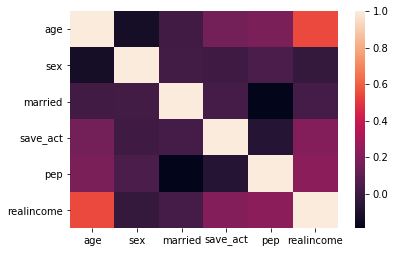

In [22]:
import seaborn as sn
sn.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.rcdefaults()

In [24]:
from sklearn.model_selection import train_test_split  # for Hold-out validation

In [25]:
dfX = mdf.drop(['id','pep'], axis=1)  # exclude 'id' attribute & class variable
dfy = mdf['pep']   
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [26]:
print(X_train.shape, X_test.shape)    

(450, 5) (150, 5)


In [29]:
train.score(X_train, y_train)

NameError: name 'train' is not defined

In [32]:
ndf['mdf'] =model_selection(ndf.loc[:,'age':'realincome'])

NameError: name 'model_selection' is not defined